# Project: Medical No-Show Appointment Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction


#### This project contains the dataset from medical appointments in Brazil. The major goal of the analysis is to determine the factors that are important to predict if a patient will show up for their scheduled appointment?

In [311]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling


### 1. General Properties

In the  cell below we will load the data from the CSV file in to a DataFrame. We will also check basic information about the data.

In [312]:
df = pd.read_csv('noshowappointments.csv')

In [313]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


The data consist of 110527 entries and 14 columns with no Null values in any of the columns. 

In [314]:
# Print the top 10 rows
df.head(10)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
5,9.598513e+13,5626772,F,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,76,REPÚBLICA,0,1,0,0,0,0,No
6,7.336882e+14,5630279,F,2016-04-27T15:05:12Z,2016-04-29T00:00:00Z,23,GOIABEIRAS,0,0,0,0,0,0,Yes
7,3.449833e+12,5630575,F,2016-04-27T15:39:58Z,2016-04-29T00:00:00Z,39,GOIABEIRAS,0,0,0,0,0,0,Yes
8,5.639473e+13,5638447,F,2016-04-29T08:02:16Z,2016-04-29T00:00:00Z,21,ANDORINHAS,0,0,0,0,0,0,No
9,7.812456e+13,5629123,F,2016-04-27T12:48:25Z,2016-04-29T00:00:00Z,19,CONQUISTA,0,0,0,0,0,0,No


### 2. Data Cleaning (Correcting Inconsistencies in the Data)

Below are the inconsistences in the data to be corrected.

1. Removal of PatientId and AppointmentID form the data (they are system-generated value)
2. Data Type of ScheduledDay and AppointmentDay will be changed to DateTime.
3. Errors in the Column names (Hipertension, Handcap) will be corrected. 
4. Renaming of Column names (SMS_receieved and No-Received) for readability
5. Data Type of (Scholarship, Hypertension, Diabetes, Alcoholism and SMSReceived will be changed to object because they have two values which is either Yes or No

In [315]:
# Convert ScheduledDay and AppointmentDay from 'object' type to 'datetime64'
df.ScheduledDay = df.ScheduledDay.apply(np.datetime64)
df.AppointmentDay = df.AppointmentDay.apply(np.datetime64)
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [316]:
# Rename incorrect column names.
df = df.rename(columns={'Hipertension': 'Hypertension', 'Handcap': 'Handicap', 'SMS_received': 'SMSReceived', 'No-show': 'NoShow'})

In [317]:
# Drop 'PatientId' and 'AppointmentID' as they are just some system genrated numbers.
df.drop(['PatientId', 'AppointmentID'], axis=1, inplace=True)

In [318]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Gender          110527 non-null  object        
 1   ScheduledDay    110527 non-null  datetime64[ns]
 2   AppointmentDay  110527 non-null  datetime64[ns]
 3   Age             110527 non-null  int64         
 4   Neighbourhood   110527 non-null  object        
 5   Scholarship     110527 non-null  int64         
 6   Hypertension    110527 non-null  int64         
 7   Diabetes        110527 non-null  int64         
 8   Alcoholism      110527 non-null  int64         
 9   Handicap        110527 non-null  int64         
 10  SMSReceived     110527 non-null  int64         
 11  NoShow          110527 non-null  object        
dtypes: datetime64[ns](2), int64(7), object(3)
memory usage: 10.1+ MB


From the above Info of the DataFrame and the sample data we can see that there are 12 columns in total.

There are 11 Independent Variables -> ['Gender' 'ScheduledDay' 'AppointmentDay' 'Age' 'Neighbourhood' 'Scholarship' 'Hypertension' 'Diabetes' 'Alcoholism' 'Handicap' 'SMSReceived']
The Dependent Variable is -> ['NoShow']

In [319]:
#Idenitify the unique values in the columns
print("Unique Counts in `Gender` => {}".format(df.Gender.nunique()))
print("Unique Counts in `ScheduledDay` => {}".format(df.ScheduledDay.nunique()))
print("Unique Counts in `AppointmentDay` => {}".format(df.AppointmentDay.nunique()))
print("Unique Counts in `Age` => {}".format(df.Age.nunique()))
print("Unique Counts in `Neighbourhood` => {}".format(df.Neighbourhood.nunique()))
print("Unique Counts in `Scholarship` => {}".format(df.Scholarship.nunique()))
print("Unique Counts in `Hypertension` => {}".format(df.Hypertension.nunique()))
print("Unique Counts in `Diabetes` => {}".format(df.Diabetes.nunique()))
print("Unique Counts in `Alcoholism` => {}".format(df.Alcoholism.nunique()))
print("Unique Counts in `Handicap` => {}".format(df.Handicap.nunique()))
print("Unique Counts in `SMSReceived` => {}".format(df.SMSReceived.nunique()))
print("Unique Counts in `NoShow` => {}".format(df.NoShow.nunique()))

Unique Counts in `Gender` => 2
Unique Counts in `ScheduledDay` => 103549
Unique Counts in `AppointmentDay` => 27
Unique Counts in `Age` => 104
Unique Counts in `Neighbourhood` => 81
Unique Counts in `Scholarship` => 2
Unique Counts in `Hypertension` => 2
Unique Counts in `Diabetes` => 2
Unique Counts in `Alcoholism` => 2
Unique Counts in `Handicap` => 5
Unique Counts in `SMSReceived` => 2
Unique Counts in `NoShow` => 2


From the above detail we can see that Gender, Scholarship, Hypertension, Diabetes, Alcoholism, SMSReceived and Noshow  has two unique values. Hence, we will convert the columns to 'object' type considering that the values stands for ['M' and 'F'] for Gender and ['Yes' and 'No'] for other columns. 

In [320]:
# Convert columns from Integer to Object
df.Scholarship = df.Scholarship.astype('object')
df.Hypertension = df.Hypertension.astype('object')
df.Diabetes = df.Diabetes.astype('object')
df.Alcoholism = df.Alcoholism.astype('object')
df.Handicap = df.Handicap.astype('object')
df.SMSReceived = df.SMSReceived.astype('object')

In [321]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Gender          110527 non-null  object        
 1   ScheduledDay    110527 non-null  datetime64[ns]
 2   AppointmentDay  110527 non-null  datetime64[ns]
 3   Age             110527 non-null  int64         
 4   Neighbourhood   110527 non-null  object        
 5   Scholarship     110527 non-null  object        
 6   Hypertension    110527 non-null  object        
 7   Diabetes        110527 non-null  object        
 8   Alcoholism      110527 non-null  object        
 9   Handicap        110527 non-null  object        
 10  SMSReceived     110527 non-null  object        
 11  NoShow          110527 non-null  object        
dtypes: datetime64[ns](2), int64(1), object(9)
memory usage: 10.1+ MB


In [322]:
df.head(10)

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSReceived,NoShow
0,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No
5,F,2016-04-27 08:36:51,2016-04-29,76,REPÚBLICA,0,1,0,0,0,0,No
6,F,2016-04-27 15:05:12,2016-04-29,23,GOIABEIRAS,0,0,0,0,0,0,Yes
7,F,2016-04-27 15:39:58,2016-04-29,39,GOIABEIRAS,0,0,0,0,0,0,Yes
8,F,2016-04-29 08:02:16,2016-04-29,21,ANDORINHAS,0,0,0,0,0,0,No
9,F,2016-04-27 12:48:25,2016-04-29,19,CONQUISTA,0,0,0,0,0,0,No


In [323]:
#Print the unique values of Age
df.Age.value_counts()

 0      3539
 1      2273
 52     1746
 49     1652
 53     1651
        ... 
 115       5
 100       4
 102       2
 99        1
-1         1
Name: Age, Length: 104, dtype: int64

In the above, we see a negative age which is not possible. We will go ahead and remove the negative age from the data

In [324]:
#Filter out negative values from Age
df = df[df.Age >= 0]

In [325]:
#Group the Age into Infant, Kid, Teen, Adult, Senior Adult
bins= [0,4,13,18,50,115]
labels = ['Infant','Kid','Teen','Adult', 'Senior Adult']
df['AgeGroup'] = pd.cut(x=df['Age'], bins=bins, labels=labels, right=False)

We summarized the Age to AgeGroup to see if there are many 'NoShows' among each of the AgeGroups. AgeGroup will also helps us to see if there is a particular AgeGroup of most of the patients that are coming for a visit.

In [326]:
df.AgeGroup.value_counts()

Adult           46111
Senior Adult    37031
Kid             12093
Infant           8943
Teen             6343
Name: AgeGroup, dtype: int64

We will need to extract Day of the Week for ScheduledDay and AppointmentDay to see if there are many 'NoShows' over the weekends. Also we will need to extract the hours for the AppointmentDay and group it into different time hour. This will help us to determine if there are many 'NoShows' at a particular hour. We will need to calculate the waiting time between the SceduledDay and AppointmentDay for us to determine if the waiting time can affect the number of 'NoShows'

In [327]:
# Get Day of the Week for AppointmentDay
df['AppointmentDay_DOW'] = df['AppointmentDay'].dt.day_name()

In [328]:
df['AppointmentDay'] = np.where((df['AppointmentDay'] - df['ScheduledDay']).dt.days < 0, df['ScheduledDay'], df['AppointmentDay'])

# Get the Waiting Time in Days of the Patients.
df['Waiting_Time_days'] = df['AppointmentDay'] - df['ScheduledDay']
df['Waiting_Time_days'] = df['Waiting_Time_days'].dt.days

In [329]:
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSReceived,NoShow,AgeGroup,AppointmentDay_DOW,Waiting_Time_days
0,F,2016-04-29 18:38:08,2016-04-29 18:38:08,62,JARDIM DA PENHA,0,1,0,0,0,0,No,Senior Adult,Friday,0
1,M,2016-04-29 16:08:27,2016-04-29 16:08:27,56,JARDIM DA PENHA,0,0,0,0,0,0,No,Senior Adult,Friday,0
2,F,2016-04-29 16:19:04,2016-04-29 16:19:04,62,MATA DA PRAIA,0,0,0,0,0,0,No,Senior Adult,Friday,0
3,F,2016-04-29 17:29:31,2016-04-29 17:29:31,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,Kid,Friday,0
4,F,2016-04-29 16:07:23,2016-04-29 16:07:23,56,JARDIM DA PENHA,0,1,1,0,0,0,No,Senior Adult,Friday,0


In [330]:
# Get Time in Hours for AppointmentDay
df['AppointmentDay_Hour'] = df['AppointmentDay'].dt.hour

#Convert the AppointmentDay_Session to Different Time Hour (1-Late Night, 2-Early Morning, 3-Morning, 4-Noon, 5-Evening, 6-Night)
df['AppointmentDay_session'] = (df['AppointmentDay_Hour'] % 24 + 4)// 4

df.AppointmentDay_session.unique()

array([5, 1, 3, 4, 2, 6])

In [331]:
#Remove columns that are necessary from the dataset
df.drop(['AppointmentDay_Hour', 'ScheduledDay', 'AppointmentDay', 'Age'], axis=1, inplace=True)

In [332]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 13 columns):
 #   Column                  Non-Null Count   Dtype   
---  ------                  --------------   -----   
 0   Gender                  110526 non-null  object  
 1   Neighbourhood           110526 non-null  object  
 2   Scholarship             110526 non-null  object  
 3   Hypertension            110526 non-null  object  
 4   Diabetes                110526 non-null  object  
 5   Alcoholism              110526 non-null  object  
 6   Handicap                110526 non-null  object  
 7   SMSReceived             110526 non-null  object  
 8   NoShow                  110526 non-null  object  
 9   AgeGroup                110521 non-null  category
 10  AppointmentDay_DOW      110526 non-null  object  
 11  Waiting_Time_days       110526 non-null  int64   
 12  AppointmentDay_session  110526 non-null  int64   
dtypes: category(1), int64(2), object(10)
memory usage: 11.1+ MB

From the above Info of the DataFrame we can see that there are 14 columns in total after the Data Wrangling

There are 13 Independent Variables -> ['Gender' 'Neighbourhood' 'Scholarship' 'Hypertension' 'Diabetes' 'Alcoholism' 'Handicap' 'SMSReceived' 'AgeGroup' 'AppointmentDay_DOW' 'Age' 'AppointmentDay_session' 'Waiting_Time_days']
The Dependent Variable is -> ['NoShow']

In [333]:
print("NoShow and Show Count of Patients\n")
print(df.groupby(['NoShow']).size())

print("\nNoShow and Show '%' of Patients\n")
show = df.groupby(['NoShow']).size()[0]/(df.groupby(['NoShow']).size()[0]+df.groupby(['NoShow']).size()[1])
print("Percent of Patients who `Showed Up` => {:.2f}%".format(show*100))
noshow = df.groupby(['NoShow']).size()[1]/(df.groupby(['NoShow']).size()[0]+df.groupby(['NoShow']).size()[1])
print("Percent of Patients who Did `Not Showed Up` => {:.2f}%".format(noshow*100))

NoShow and Show Count of Patients

NoShow
No     88207
Yes    22319
dtype: int64

NoShow and Show '%' of Patients

Percent of Patients who `Showed Up` => 79.81%
Percent of Patients who Did `Not Showed Up` => 20.19%


<a id='eda'></a>
## Exploratory Data Analysis



#### 1.0 Show/NoShow

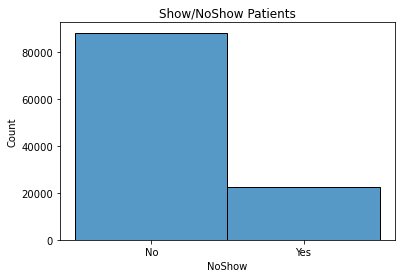

In [362]:
#Show/NoShow Distribution
ax = sns.histplot(n)
ax.set_title("Show/NoShow Patients")
plt.show()

#Variable declaration for patients that show up for the appointment and NoShow Column
d = df[df.NoShow == 'No']
n = df.NoShow

Above we can see that out of 110,526 patients around 88,205 of them have turned up (around 80%) and 22,316 of them did not turned up (around 20%). 

#### 2.0 NoShow per AgeGroup

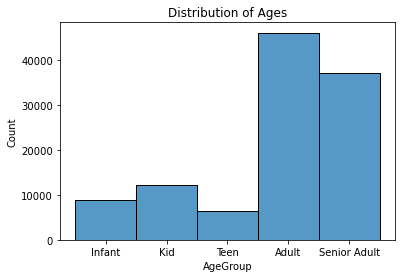

In [363]:
#AgeGroup Distribution
ax = sns.histplot(df.AgeGroup)
ax.set_title("Distribution of Ages")
plt.show()

The AgeGroup distribution shows that it is left-skewed which means that patients of 18 years and above schedule more appointments.

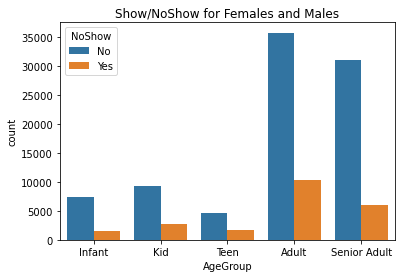

In [364]:
#Show/NoShow plot for Gender
ax = sns.countplot(x=df.AgeGroup, hue=n)
ax.set_title("Show/NoShow for Females and Males")
plt.show()

Above, we see that Adults between the age 18 and 50 scheduled for more appointments followed by the Senior Adults (age 60 upwards). The chart below shows that almost 88% of Senior Adults, 83% of Infant and 78% of Adults showed up for their appointments. This means that Adult in general has the tendency of showing up for appointments.

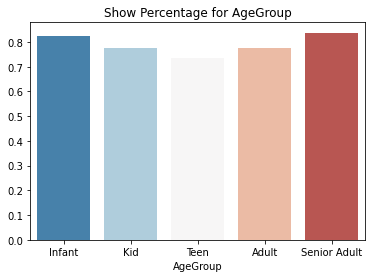

In [365]:
#Show Percentage for AgeGroup
df_a_ratio = d.groupby(['AgeGroup']).size()/df.groupby(['AgeGroup']).size()
ax = sns.barplot(x=df_a_ratio.index, y=df_a_ratio, palette="RdBu_r")
ax.set_title("Show Percentage for AgeGroup")
plt.show()

#### 3.0 NoShow per Gender

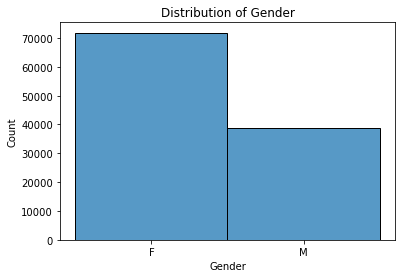

In [338]:
#Distribution of Gender
ax = sns.histplot(df.Gender)
ax.set_title("Distribution of Gender")
plt.show()

The above visualization clearly shows that 'Female' patients typically schedule for more appointments than 'Male' patients. As a result, **Gender** could be an important factor in determine the NoShow for Appointment

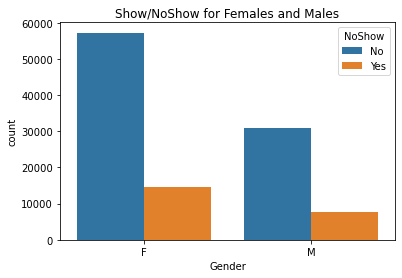

In [339]:
#Show/NoShow for Gender
ax = sns.countplot(x=df.Gender, hue=n)
ax.set_title("Show/NoShow for Females and Males")
plt.show()

The above visualization clearly shows that 'Female' patients typically show for more appointments than 'Male' patients. As a result, **Gender** could be an important factor. However, when we look closely at the chart below, we see that it is nearly identical. As a result, **Gender** may not play a significant role in determining whether or not a patient comes for a visit.

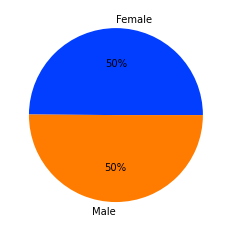

In [340]:
#Show Percentage for Gender
df_g_ratio = d.groupby(['Gender']).size()/df.groupby(['Gender']).size()
keys=['Female', 'Male']
ax = plt.pie(df_g_ratio, labels=keys, colors=palette_color, autopct='%.0f%%')
plt.show()

#### 4.0 NoShow per Scholarship

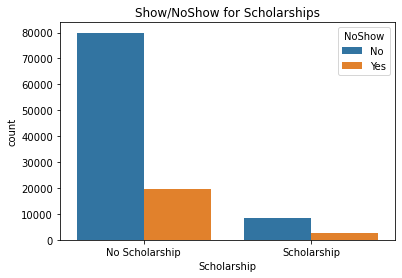

In [341]:
#Show/NoShow for Scholarships
ax = sns.countplot(x=df.Scholarship, hue=n)
ax.set_title("Show/NoShow for Scholarships")
x_ticks_labels=['No Scholarship', 'Scholarship']
ax.set_xticklabels(x_ticks_labels)
plt.show()

From the above visualization we can see that there are patients without Scholarship and out of them around 80% have come for the visit.

- The piechart shows that patients without scholarship are likely to show for their appointments.

So, Scholarship feature could help us in determining if a patient will turn up for the visit after an appointment.

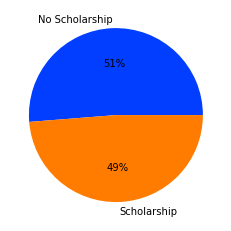

In [342]:
#Show Percentage for Scholarship
df_s_ratio = d.groupby(['Scholarship']).size()/df.groupby(['Scholarship']).size()
keys=['No Scholarship', 'Scholarship']
ax = plt.pie(df_s_ratio, labels=keys, colors=palette_color, autopct='%.0f%%')
plt.show()

#### 5.0 NoShow per Hypertension

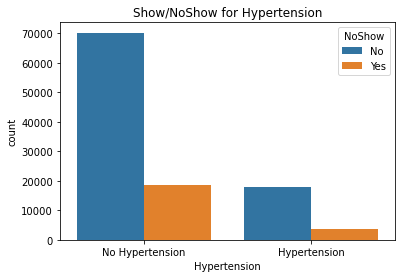

In [343]:
#Show/NoShow for Hypertension
ax = sns.countplot(x=df.Hypertension, hue=n)
ax.set_title("Show/NoShow for Hypertension")
x_ticks_labels=['No Hypertension', 'Hypertension']
ax.set_xticklabels(x_ticks_labels)
plt.show()

- From the above visualization we can see that there are more patients without Hypertension and out of them around 78% have come for the visit.
- The piechart shows that people with Hypertension tends to appear for their appointments.

So, Hypertension feature could help us in determining if a patient will turn up for the visit after an appointment.

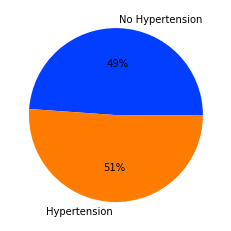

In [344]:
#Show Percentage for Hypertension
df_h_ratio = d.groupby(['Hypertension']).size()/df.groupby(['Hypertension']).size()
keys=['No Hypertension', 'Hypertension']
palette_color = sns.color_palette('bright')
ax = plt.pie(df_h_ratio, labels=keys, colors=palette_color, autopct='%.0f%%')
plt.show()

#### 6.0 NoShow per Appointment Hour Session

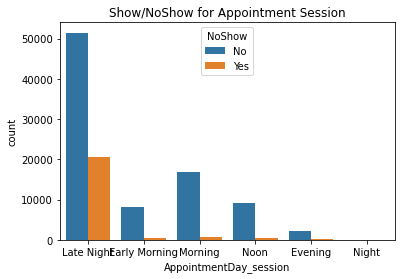

In [345]:
#Show/NoShow for Appointment Session
ax = sns.countplot(x=df.AppointmentDay_session, hue=n)
ax.set_title("Show/NoShow for Appointment Session")
x_ticks_labels=['Late Night', 'Early Morning', 'Morning', 'Noon', 'Evening', 'Night']
ax.set_xticklabels(x_ticks_labels)
plt.show()

The visualization shows that more appointment are booked for late night (between 0 and 4) but eventually did not show for their appointments. There were few appointments in the night. 

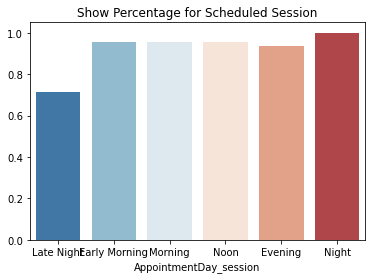

In [346]:
#Show Percentage for Scheduled Session
df_d_ratio = d.groupby(['AppointmentDay_session']).size()/df.groupby(['AppointmentDay_session']).size()
ax = sns.barplot(x=df_d_ratio.index, y=df_d_ratio, palette="RdBu_r")
ax.set_title("Show Percentage for Scheduled Session")
x_ticks_labels=['Late Night', 'Early Morning', 'Morning', 'Noon', 'Evening', 'Night']
ax.set_xticklabels(x_ticks_labels)
plt.show()

#### 7.0 NoShow per Diabetes

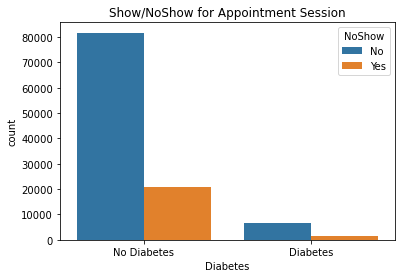

In [347]:
#Show/NoShow for Appointment Session
ax = sns.countplot(x=df.Diabetes, hue=n)
ax.set_title("Show/NoShow for Appointment Session")
x_ticks_labels=['No Diabetes', 'Diabetes']
ax.set_xticklabels(x_ticks_labels)
plt.show()

- From the above visualization we can see that there are  patients without Diabetes and out of them around 80% have come for the visit.
- Patients with diabetes have tendency to appear for their appointments 

So, Diabetes feature could help us in determining if a patient will turn up for the visit after an appointment.

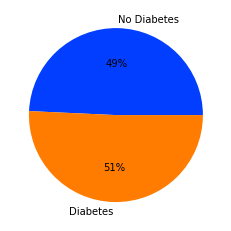

In [348]:
#Show Percentage for Diabetes
df_d_ratio = d.groupby(['Diabetes']).size()/df.groupby(['Diabetes']).size()
keys=['No Diabetes', 'Diabetes']
palette_color = sns.color_palette('bright')
ax = plt.pie(df_d_ratio, labels=keys, colors=palette_color, autopct='%.0f%%')
plt.show()

#### 9.0 NoShow per Alcoholism


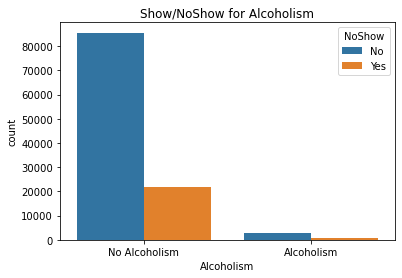

In [349]:
#Show/NoShow for Alcoholism
ax = sns.countplot(x=df.Alcoholism, hue=n)
ax.set_title("Show/NoShow for Alcoholism")
x_ticks_labels=['No Alcoholism', 'Alcoholism']
ax.set_xticklabels(x_ticks_labels)
plt.show()

- From the above visualization we can see that there are  more patients with no alcohol and out of them around over 85% have came for the visit. 
- Patients without alcohol visit hospital often compared to patients with alcohol.

There is no difference between the turn out of people between the nonalcoholism and alcoholism

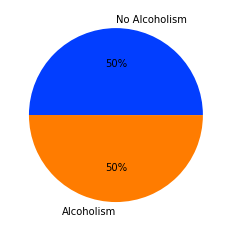

In [350]:
#Show Percentage for Alcoholism
df_a_ratio = d.groupby(['Alcoholism']).size()/df.groupby(['Alcoholism']).size()
keys=['No Alcoholism', 'Alcoholism']
palette_color = sns.color_palette('bright')
ax = plt.pie(df_a_ratio, labels=keys, colors=palette_color, autopct='%.0f%%')
plt.show()

#### 10.0 NoShow per Handicap Levels

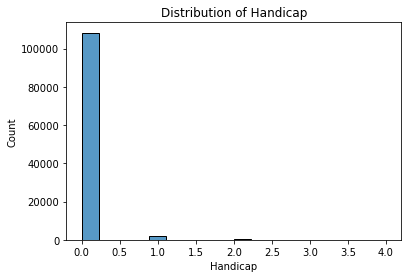

In [351]:
#Distribution of Handicap Levels
ax = sns.histplot(df.Handicap)
ax.set_title("Distribution of Handicap")
plt.show()

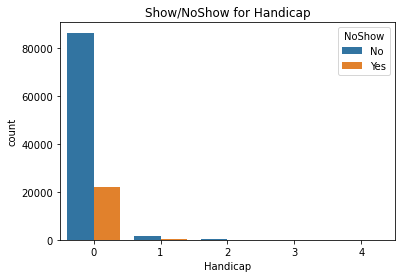

In [352]:
#Show/NoShow for Handicap
ax = sns.countplot(x=df.Handicap, hue=n)
ax.set_title("Show/NoShow for Handicap")
plt.show()

- From the above visualization we can see that there are  more patients with handicap level 0 and out of them around over 85% have came for the visit. 

As we can see a clear distinction between different Handicap levels this feature will help us in determining if a patient will turn up for the visit after taking an appointment.

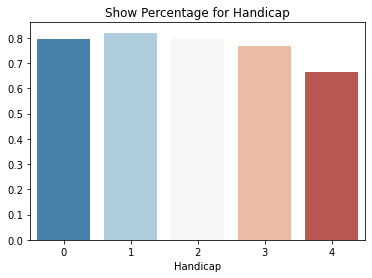

In [353]:
#Show Percentage for Handicap
df_ha_ratio = d.groupby(['Handicap']).size()/df.groupby(['Handicap']).size()
ax = sns.barplot(x=df_ha_ratio.index, y=df_ha_ratio, palette="RdBu_r")
ax.set_title("Show Percentage for Handicap")
plt.show()

#### 11.0 NoShow per SMSReceived

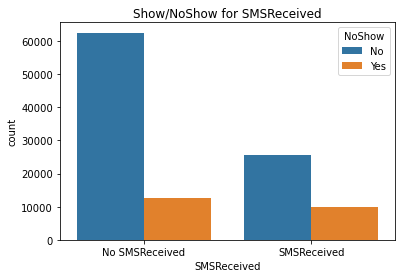

In [354]:
#Show/NoShow for SMSReceived
ax = sns.countplot(x=df.SMSReceived, hue=n)
ax.set_title("Show/NoShow for SMSReceived")
x_ticks_labels=['No SMSReceived', 'SMSReceived']
ax.set_xticklabels(x_ticks_labels)
plt.show()

People who do not receive a reminder SMS show up at the hospital compared to those those who haven't received an SMS. This is an unusal case and could help us in determining if a patient will turn up for the visit after taking an appointment.

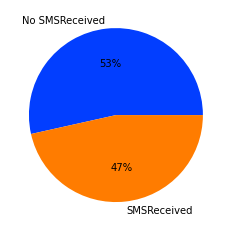

In [355]:
#Show Percentage for SMSReceived
df_s_ratio = d.groupby(['SMSReceived']).size()/df.groupby(['SMSReceived']).size()
keys=['No SMSReceived', 'SMSReceived']
palette_color = sns.color_palette('bright')
ax = plt.pie(df_s_ratio, labels=keys, colors=palette_color, autopct='%.0f%%')
plt.show()

#### 11.0 NoShow per Appointment Day of the Week

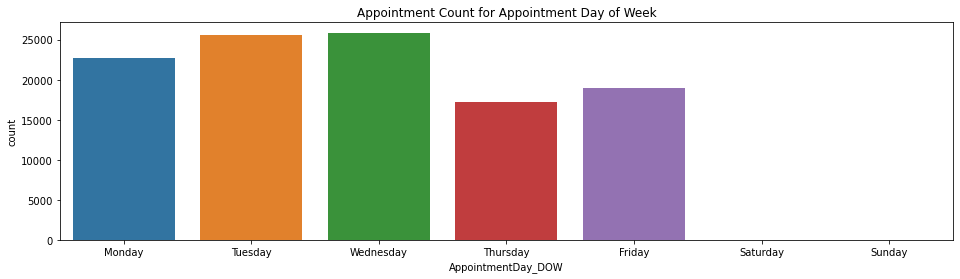

In [356]:
#Appointment Count for Appointment Day of Week
plt.figure(figsize=(16,4))
week_key = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
ax = sns.countplot(x=df.AppointmentDay_DOW, order=week_key)
ax.set_title("Appointment Count for Appointment Day of Week")
plt.show()

- The visualization above shows that there are more appointments on `weekdays` as compared to `weekends`. There is no appointment on `Sunday` and few appointments on `Saturday`. This shows that people will tend to appear for visit on weekdays. 

So, AppointmentDay_DOW could help in determining if a patient visits the hospital after taking an appointment.

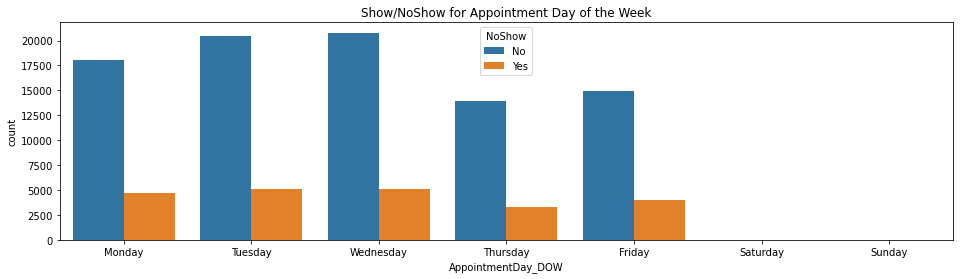

In [357]:
#Show/NoShow for Appointment Day of the Week
plt.figure(figsize=(16,4))
ax = sns.countplot(x=df.AppointmentDay_DOW, hue=n, order=week_key)
ax.set_title("Show/NoShow for Appointment Day of the Week")
plt.show()

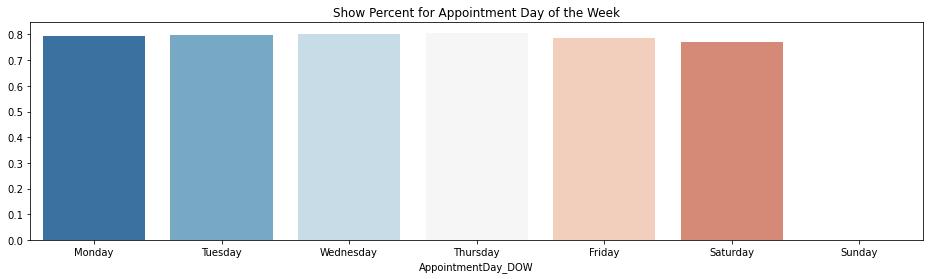

In [358]:
df_a_dow_ratio = d.groupby(['AppointmentDay_DOW']).size()/df.groupby(['AppointmentDay_DOW']).size()
plt.figure(figsize=(16,4))
ax = sns.barplot(x=df_a_dow_ratio.index, y=df_a_dow_ratio, order=week_key, palette="RdBu_r")
ax.set_title("Show Percent for Appointment Day of the Week")
plt.show()

There is no clear pattern in the patients visits based on the week day. But we can observe that on Saturday's the percentage of visits is less. So, AppointmentDay_DOW can help us in predicting the visits by a small number.

#### 12.0 NoShow per Waiting Time

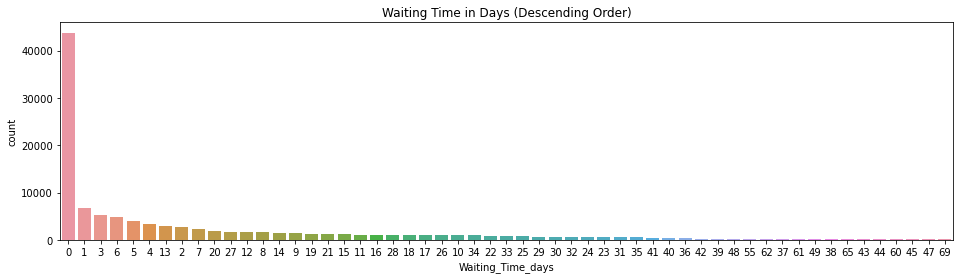

In [359]:
#Waiting Time in Days (Descending Order
plt.figure(figsize=(16,4))
ax = sns.countplot(x=df.Waiting_Time_days, order=df.Waiting_Time_days.value_counts().iloc[:55].index)
ax.set_title("Waiting Time in Days (Descending Order)")
plt.show()

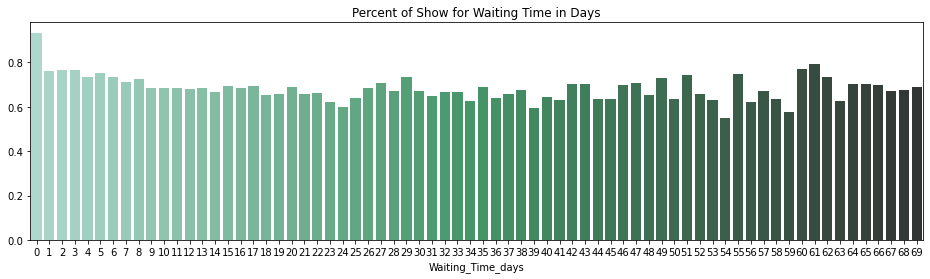

In [360]:
df_w_ratio = d.groupby(['Waiting_Time_days']).size()/df.groupby(['Waiting_Time_days']).size()
plt.figure(figsize=(16,4))
ax = sns.barplot(x=df_w_ratio.index, y=df_w_ratio, order=df.Waiting_Time_days.iloc[:70].index, palette="BuGn_d")
ax.set_title("Percent of Show for Waiting Time in Days")
plt.show()

- From the above visualization we can see that most of the patients are booking their appointments on the same day. The next highest waiting times are 2days, 4 days and 1 day.

- Around 90% of Patients who have booked their appointments on the same day and visiting the hospital without fail. Also close to 80% of the patients are visiting the hospital if they had booked their appointments just before 4 days.

Waiting_Time can help us in predicting the No of Show Up for the Appointments

<a id='conclusions'></a>
## Conclusions
In this project, I examined the features that are responding for patients to show up for their Appointments. I  made my analyzation based on `AgeGroup, Gender, Scholarship, Hypertension, Appointment Hour Session, Diabetes, Alcoholism, Handicap Levels, SMSReceived, AppointmentWeekDay of the Week, Waiting Time (time difference between the ScheduledDay and AppointmentDay` .

The analysis shows that the following sets of patients shows us for their appointments. 
- Older patients in the category of Adults and Senior Adults, 
- Patients with Hypertension, 
- Patients with Diabetes,
- Patients that their waiting time is between 0 to 4 days,
- Patients generally appear for their appointments during weekdays. 

### Limitations
In this analysis, the effects of scholarship supports and SMS reminder does not have any impact on the patients show up for their appointments. We might need to further analyze if the SMS reminder scares people from their appointments and also know whether the scholarship supports comes with some conditions that discourages to the patients. 